In [11]:
import numpy as np 
import pandas as pd 
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [12]:
stocks_data = pd.read_csv('stocks.csv')
print(stocks_data.head())

  Ticker        Date        Open        High         Low       Close  \
0   AAPL  2023-02-07  150.639999  155.229996  150.639999  154.649994   
1   AAPL  2023-02-08  153.880005  154.580002  151.169998  151.919998   
2   AAPL  2023-02-09  153.779999  154.330002  150.419998  150.869995   
3   AAPL  2023-02-10  149.460007  151.339996  149.220001  151.009995   
4   AAPL  2023-02-13  150.949997  154.259995  150.919998  153.850006   

    Adj Close    Volume  
0  154.414230  83322600  
1  151.688400  64120100  
2  150.639999  56007100  
3  151.009995  57450700  
4  153.850006  62199000  


In [13]:
stocks_data.Ticker.value_counts()

Ticker
AAPL    62
MSFT    62
NFLX    62
GOOG    62
Name: count, dtype: int64

In [14]:
descriptive_stats = stocks_data.groupby('Ticker')
descriptive_stats['Close'].describe()

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
AAPL,62.0,158.240645,7.360485,145.309998,152.077499,158.055000,165.162506,173.570007
GOOG,62.0,100.631532,6.279464,89.349998,94.702501,102.759998,105.962503,109.459999
MSFT,62.0,275.039839,17.676231,246.270004,258.742500,275.810013,287.217506,310.649994
NFLX,62.0,327.614677,18.554419,292.760010,315.672493,325.600006,338.899994,366.829987


**Time Series Analysis**

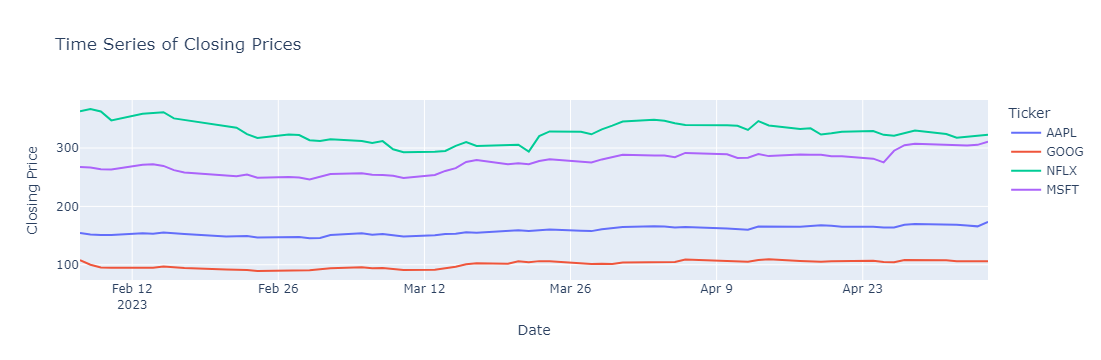

In [15]:
stocks_data['Date'] = pd.to_datetime(stocks_data['Date'])
pivot_data = stocks_data.pivot(index='Date',columns='Ticker',values='Close')
fig = make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=pivot_data.index,y=pivot_data['AAPL'],name='AAPL'))
fig.add_trace(go.Scatter(x=pivot_data.index,y=pivot_data['GOOG'],name='GOOG'))
fig.add_trace(go.Scatter(x=pivot_data.index,y=pivot_data['NFLX'],name='NFLX'))
fig.add_trace(go.Scatter(x=pivot_data.index,y=pivot_data['MSFT'],name='MSFT'))

fig.update_layout(
    title_text="Time Series of Closing Prices",
    xaxis_title='Date',
    yaxis_title='Closing Price',
    legend_title='Ticker',
    showlegend=True
)

fig.show()

**Volatility Analysis**

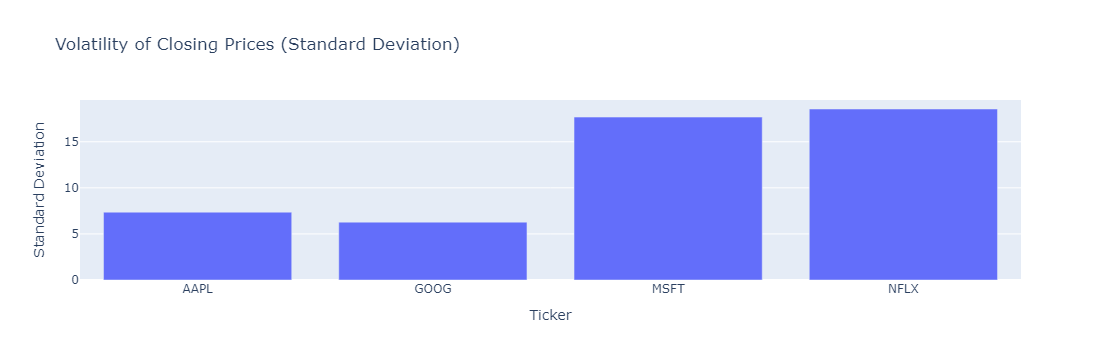

In [16]:
volatility = pivot_data.std()
fig = px.bar(
    volatility,
    x=volatility.index,
    y=volatility.values,
    labels={
        'y':'Standard Deviation',
        'x':'Ticker'
    },
    title='Volatility of Closing Prices (Standard Deviation)'
    )
fig.show()

It indicates that NFLX and MSFT stocks were more prone to price fluctuations during this period compared to AAPL and GOOG.

###### **Daily Risk v/s Return Analysis**

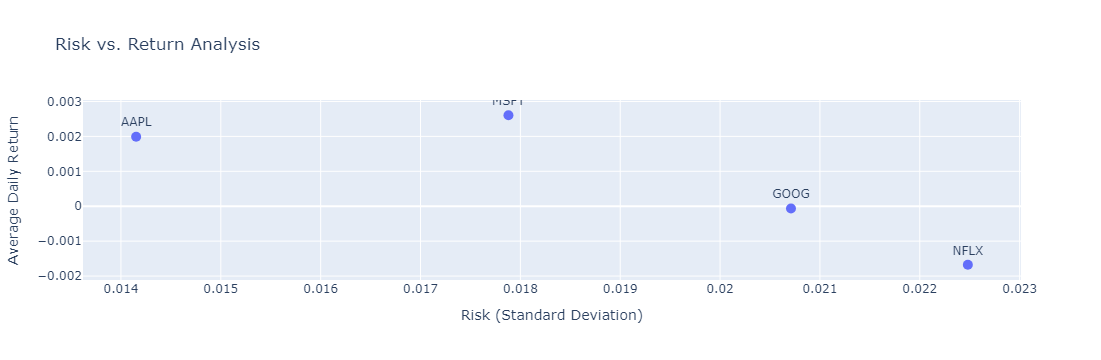

In [10]:
daily_returns = pivot_data.pct_change().dropna()
avg_daily_return = daily_returns.mean()
risk = daily_returns.std()

risk_return_df = pd.DataFrame({'Risk':risk,'Average Daily Return':avg_daily_return})

fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=risk_return_df["Risk"],
        y=risk_return_df['Average Daily Return'],
        mode="markers+text",
        text=risk_return_df.index,
        textposition="top center",
        marker=dict(size=10)
    )
)
fig.update_layout(
    title='Risk vs. Return Analysis',
    xaxis_title='Risk (Standard Deviation)',
    yaxis_title='Average Daily Return',
    showlegend=False
)
fig.show()


 AAPL shows the lowest risk combined with a positive average daily return, suggesting a more stable investment with consistent returns. GOOG has higher volatility than AAPL and, on average, a slightly negative daily return, indicating a riskier and less rewarding investment during this period.

MSFT shows moderate risk with the highest average daily return, suggesting a potentially more rewarding investment, although with higher volatility compared to AAPL. NFLX exhibits the highest risk and a negative average daily return, indicating it was the most volatile and least rewarding investment among these stocks over the analyzed period.